In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
test_df = pd.read_csv('./Data/test.csv')
train_df = pd.read_csv('./Data/train.csv')

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
def titanic_data_shaping(df):
    # Sex
    df.Sex = df.Sex.map({'female':0,'male':1})

    # Title
    # Regexp tips :
    # () : matches the group within
    # + : matches the expression to its left one or more times
    # \. search for '.' otherwise . alone is a special character
    # '([A-Za-z]+)\.' search for matches to groups of letters ending with a .

    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    least_occuring_titles = ['Dr','Rev','Major','Col','Capt','Jonkheer','Don','Sir']
    df['Feature_Title']=df['Title']
    df['Feature_Title']=df['Feature_Title'].replace(['Ms','Mme','Countess'],'Mrs')
    df['Feature_Title']=df['Feature_Title'].replace(['Lady','Mlle'],'Miss')
    df['Feature_Title']=df['Feature_Title'].replace(least_occuring_titles,'Rare')
    df.Feature_Title.value_counts()
    df.Feature_Title = df.Feature_Title.map({'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Rare':4},na_action='ignore')

    df["Ticket Number"] = [int(df.iloc[i]["Ticket"].split()[-1]) if df.iloc[i]["Ticket"].split()[-1] != 'LINE' else 0 for i in range(len(df)) ]

    # Training Data shuffle
    df = df.reindex(np.random.permutation(df.index))

    return df

train_df = titanic_data_shaping(train_df)
test_df = titanic_data_shaping(test_df)


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Feature_Title,Ticket Number
357,1249,3,"Lockyer, Mr. Edward",1,NaN,0,0,1222,7.8792,NaN,S,Mr,0.0,1222
41,933,1,"Franklin, Mr. Thomas Parham",1,NaN,0,0,113778,26.5500,D34,S,Mr,0.0,113778
210,1102,3,"Andersen, Mr. Albert Karvin",1,32.0,0,0,C 4001,22.5250,NaN,S,Mr,0.0,4001
373,1265,2,"Harbeck, Mr. William H",1,44.0,0,0,248746,13.0000,NaN,S,Mr,0.0,248746
345,1237,3,"Abelseth, Miss. Karen Marie",0,16.0,0,0,348125,7.6500,NaN,S,Miss,1.0,348125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1012,2,"Watt, Miss. Bertha J",0,12.0,0,0,C.A. 33595,15.7500,NaN,S,Miss,1.0,33595
168,1060,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",0,NaN,0,0,17770,27.7208,NaN,C,Mrs,2.0,17770
372,1264,1,"Ismay, Mr. Joseph Bruce",1,49.0,0,0,112058,0.0000,B52 B54 B56,S,Mr,0.0,112058
212,1104,2,"Deacon, Mr. Percy William",1,17.0,0,0,S.O.C. 14879,73.5000,NaN,S,Mr,0.0,14879


In [33]:
help(tf.keras.losses.binary_crossentropy)

Help on function binary_crossentropy in module tensorflow.python.keras.losses:

binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)
    Computes the binary crossentropy loss.
    
    Standalone usage:
    
    >>> y_true = [[0, 1], [0, 0]]
    >>> y_pred = [[0.6, 0.4], [0.4, 0.6]]
    >>> loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    >>> assert loss.shape == (2,)
    >>> loss.numpy()
    array([0.916 , 0.714], dtype=float32)
    
    Args:
      y_true: Ground truth values. shape = `[batch_size, d0, .. dN]`.
      y_pred: The predicted values. shape = `[batch_size, d0, .. dN]`.
      from_logits: Whether `y_pred` is expected to be a logits tensor. By default,
        we assume that `y_pred` encodes a probability distribution.
      label_smoothing: Float in [0, 1]. If > `0` then smooth the labels.
    
    Returns:
      Binary crossentropy loss value. shape = `[batch_size, d0, .. dN-1]`.



In [6]:
def build_model(model_learning_rate,feature_size,classification_threshold):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=1,input_shape=(feature_size,),activation=tf.keras.activations.sigmoid))

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=model_learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy,
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy',threshold=classification_threshold),
            tf.keras.metrics.Precision(name='precision',thresholds=classification_threshold),
            tf.keras.metrics.Recall(name='recall',thresholds=classification_threshold)]
        )

    return model

In [7]:
def train_model(model, feature, label, epochs, validation_split):
    history = model.fit(
        x=feature,
        y=label,
        batch_size=None,
        epochs=epochs,
        shuffle=True,
        validation_split=validation_split)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)


    return trained_weight, trained_bias, epochs, hist



In [8]:
def plot_results(epochs,metric,hist):
    #Loss curve
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.plot(epochs, hist[metric], label=metric,c='r')
    plt.plot(epochs, hist['val_'+metric], label='validation '+metric,c='b')
    plt.legend()
    plt.ylim([0.2, 1.0])
    plt.show()



In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Feature_Title,Ticket Number
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.723906,2.969891e+05
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.020069,6.564383e+05
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.431250e+04
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.120580e+05
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,3.470820e+05
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,4.000000,3.101317e+06


In [10]:
# Hyperparameters.
learning_rate = 0.008
epochs = 100
batch_size = 20
validation_split = 0.2
classification_threshold = 0.2

my_feature = ["Pclass","Feature_Title","Sex"]
my_label="Survived" 

# Discard any pre-existing version of the model.
my_model = None

# Save previous results
#prev_hist = hist
#prev_epochs = epochs

# Build and Train
my_model = build_model(learning_rate,len(my_feature),classification_threshold)
weight, bias, epochs, hist = train_model(my_model, train_df[my_feature], train_df[my_label], epochs, validation_split)

accuracy: 0.6983 - val_precision: 0.5478 - val_recall: 0.9692
Epoch 12/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4844 - accuracy: 0.6882 - precision: 0.5638 - recall: 0.8773 - val_loss: 0.4655 - val_accuracy: 0.7654 - val_precision: 0.6186 - val_recall: 0.9231
Epoch 13/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4827 - accuracy: 0.7402 - precision: 0.6198 - recall: 0.8592 - val_loss: 0.4631 - val_accuracy: 0.7654 - val_precision: 0.6186 - val_recall: 0.9231
Epoch 14/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4818 - accuracy: 0.7402 - precision: 0.6198 - recall: 0.8592 - val_loss: 0.4631 - val_accuracy: 0.7654 - val_precision: 0.6186 - val_recall: 0.9231
Epoch 15/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4804 - accuracy: 0.7402 - precision: 0.6198 - recall: 0.8592 - val_loss: 0.4605 - val_accuracy: 0.7654 - val_precision: 0.6186 - val_recall: 0.9231
Epoch 16/100
23/23 [======================

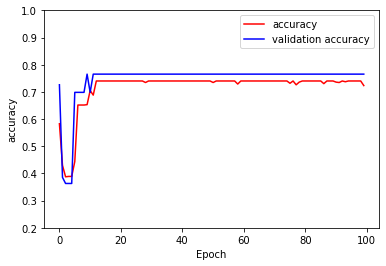

In [11]:
plot_results(epochs,'accuracy',hist)

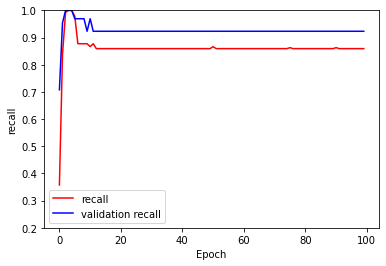

In [12]:
plot_results(epochs,'recall',hist)

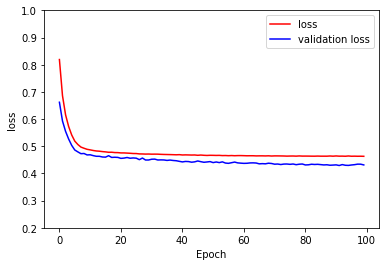

In [13]:
plot_results(epochs,'loss',hist)

In [14]:
weight, bias

(array([[-0.7349889],
        [ 0.4139246],
        [-2.2236679]], dtype=float32),
 array([2.2101357], dtype=float32))

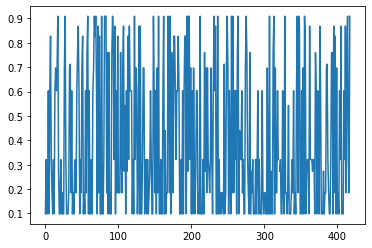

In [27]:
# Predict
plt.plot(my_model.predict(test_df[my_feature]))

In [30]:
prediction_tensor = tf.keras.activations.sigmoid(np.dot(test_df[my_feature],weight)+bias)

In [129]:
# Prepare sumbmission file
prediction_df = test_df[["PassengerId"]].copy()

In [143]:
list_of_list = (prediction_tensor.numpy() >= 0.2).astype(int).tolist()
survived_list = [item for elem in list_of_list for item in elem]
prediction_df = prediction_df.assign(Survived=survived_list)

In [144]:
prediction_df.to_csv('./deeplearning_submission.csv',index=False,header=True)